In [2]:
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('data/car insurancre/Car_Insurance_Claim.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
is_NaN = df.isnull()
rows_with_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[rows_with_NaN]
rows_with_NaN.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
13,569640,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,906223,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,517747,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,24851,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,104086,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0


# Exploring the data

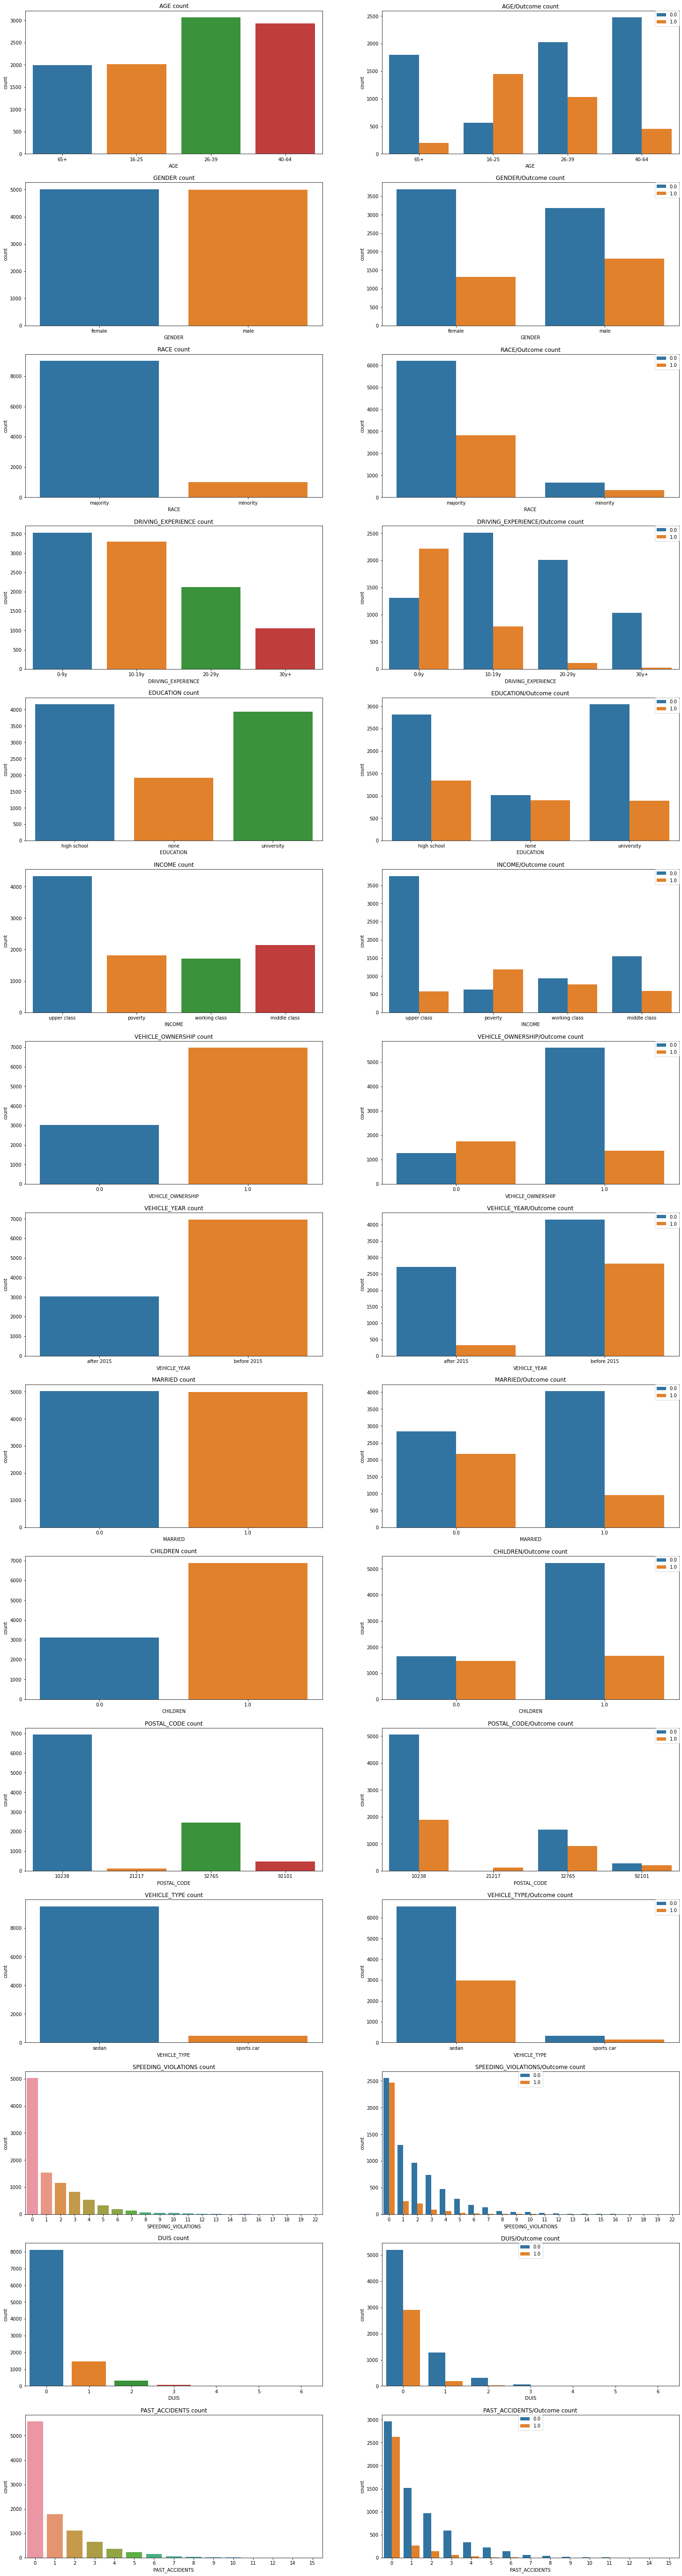

In [56]:
colums = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
          'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
          'CHILDREN', 'VEHICLE_TYPE',
          'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

fig,axes = plt.subplots(15,2,figsize=(25,100))
row = 0
for i in colums:
    axes[row,0].set_title("{} count".format(i))
    sns.countplot(data=df,x=i,ax=axes[row,0])
    axes[row,1].set_title("{}/Outcome count".format(i))
    g = sns.countplot(data=df,x=i,hue='OUTCOME',ax=axes[row,1])
    g.legend(loc=0, borderaxespad=0.)
    row = row + 1

<AxesSubplot:title={'center':'credit score histogram'}, xlabel='CREDIT_SCORE', ylabel='Count'>

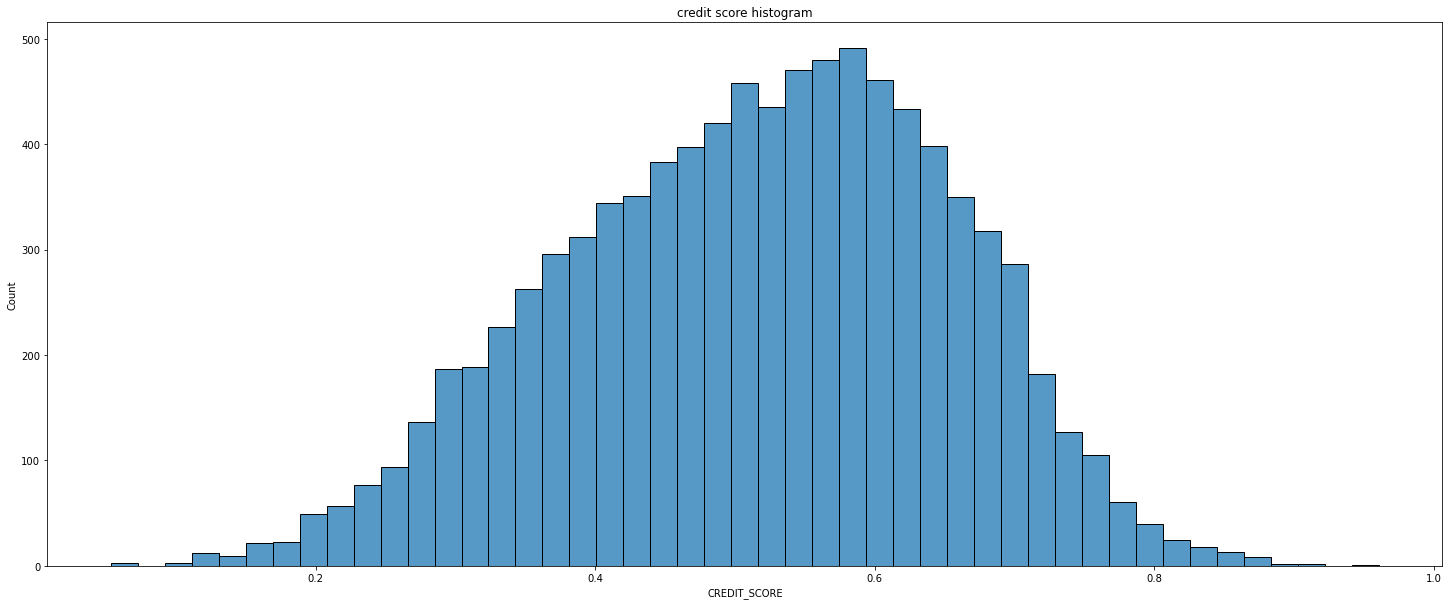

In [62]:
plt.figure(figsize=(25,10))
plt.title("credit score histogram")
sns.histplot(data=df,x='CREDIT_SCORE',)

In [71]:
df.groupby('OUTCOME')['CREDIT_SCORE'].mean()

OUTCOME
0.0    0.546092
1.0    0.449571
Name: CREDIT_SCORE, dtype: float64

<AxesSubplot:title={'center':'Annual Milege histogram'}, xlabel='ANNUAL_MILEAGE', ylabel='Count'>

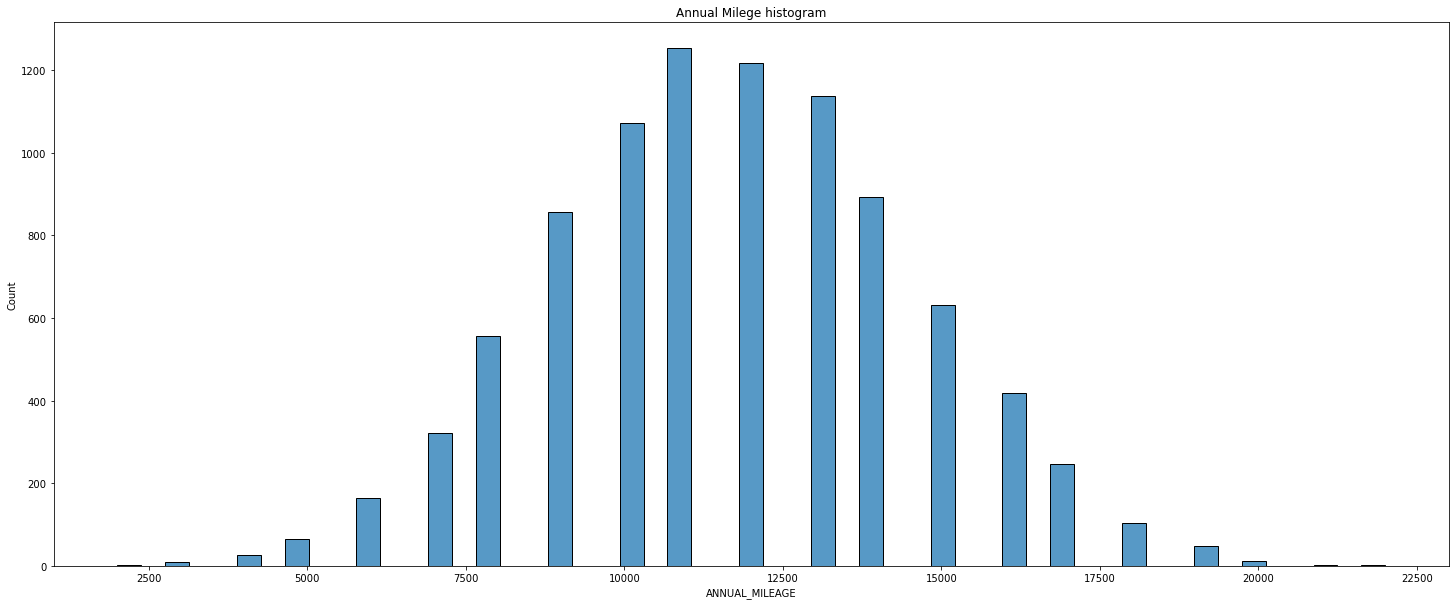

In [63]:
plt.figure(figsize=(25,10))
plt.title("Annual Milege histogram")
sns.histplot(data=df,x='ANNUAL_MILEAGE')

In [103]:
print(df.groupby('AGE')['ANNUAL_MILEAGE'].mean())

AGE
16-25    12939.645626
26-39    12041.591320
40-64    11178.184535
65+      10689.693593
Name: ANNUAL_MILEAGE, dtype: float64


In [95]:
df['INCOME'].value_counts()
tdf = df.replace(['upper class','middle class','poverty','working class'],[0,1,2,3])

tdf.groupby('INCOME')['CREDIT_SCORE'].mean()

INCOME
0    0.613827
1    0.523659
2    0.348331
3    0.431929
Name: CREDIT_SCORE, dtype: float64

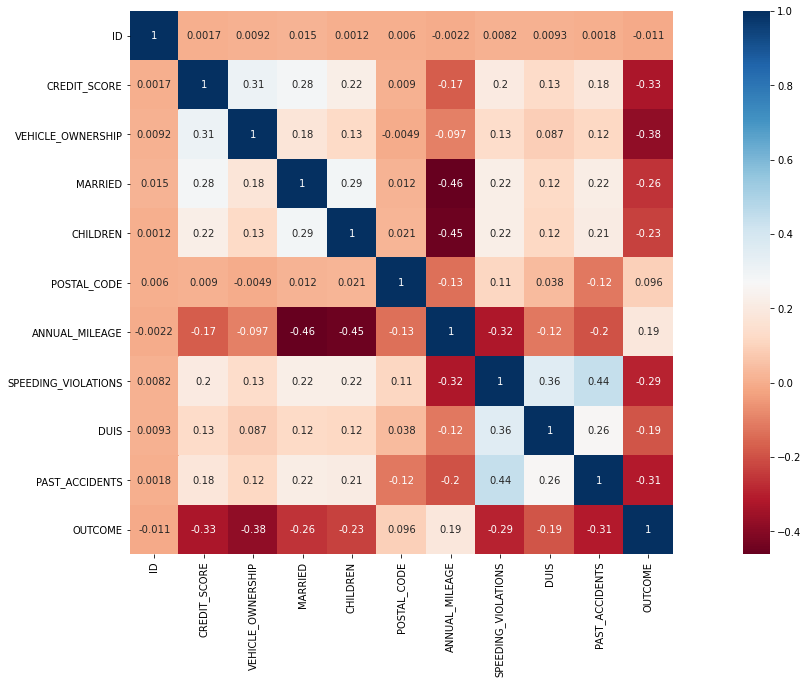

In [116]:
plt.figure(figsize=(25,10))
colormap = plt.cm.RdBu
sns.heatmap(df.corr(), annot=True, cmap=colormap,square=True )
plt.show()

